# (Probabalistic) YIN for Fundamental Frequency Tracking
## Chris Tralie

In [1]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
from matplotlib import animation

import librosa
import IPython.display as ipd
from tqdm import tqdm

from utils import inline_video

In [2]:
x, sr = librosa.load("brendancher.m4a", sr=44100)

/tmp/ipykernel_44246/3289013849.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  x, sr = librosa.load("brendancher.m4a", sr=44100)
/home/ctralie/miniconda3/lib/python3.13/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


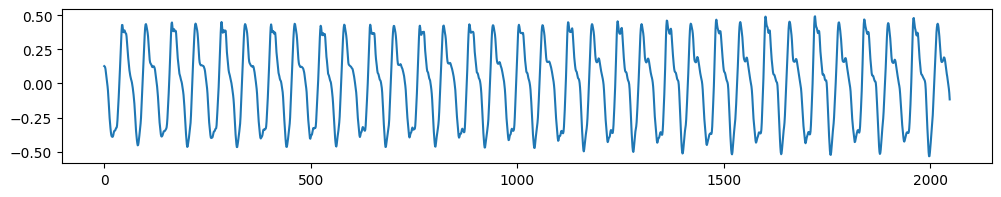

In [3]:
i1 = int(sr*30.77)
win_length = 2048
frame_length = win_length*2
xf = x[i1:i1+frame_length]
plt.figure(figsize=(12, 2))
plt.plot(xf[0:win_length])
ipd.Audio(xf, rate=sr)

In [ ]:
fig = plt.figure(figsize=(12, 6))
a = np.fft.rfft(xf)
b = np.fft.rfft(xf[0:win_length], frame_length, axis=0) # Cut out only window length and zeropad
acf = np.fft.irfft(a*np.conj(b), axis=0)[0:win_length]
acf[np.abs(acf) < 1e-6] = 0
mn = np.min(acf)
mx = np.max(acf)
rg = mx-mn
mn -= 0.1*rg
mx += 0.1*rg

maxs = []
plot_idx = 0
for i in tqdm(range(370)):
    plt.clf()
    plt.subplot(211)
    # First Signal
    plt.plot(xf, c='C0')
    # Correlating signal
    plt.plot(i+np.arange(win_length), xf[0:win_length], c='C1')
    # Box
    plt.plot([i, i], [-0.8, 0.8], c='C1')
    plt.plot([i+win_length, i+win_length], [-0.8, 0.8], c='C1')
    plt.plot([i, i+win_length], [0.8, 0.8], c='C1')
    plt.plot([i, i+win_length], [-0.8, -0.8], c='C1')
    plt.ylim([-1, 1])
    plt.xlim([0, frame_length])
    plt.gca().set_xticks([])
    is_max = False
    if i > 0 and acf[i] > acf[i-1] and acf[i] > acf[i+1]:
        maxs.append(i)
        plt.title("Shift {} (max!)".format(i))
        is_max = True
    else:
        plt.title("Shift {}".format(i))
    
    
    plt.subplot(212)
    acfplot = np.array(acf)
    acfplot[i+1::] = np.inf
    plt.plot(acfplot)
    if len(maxs) > 0:
        plt.scatter(np.array(maxs), acfplot[np.array(maxs, dtype=int)])
    plt.xlim([0, frame_length])
    plt.xticks(np.arange(0, 420, 60), rotation=90)
    
    #plt.gca().set_xticks([])
    plt.ylim(mn, mx)
    plt.title("Autocorrelation")
    
    reps = 1
    if is_max:
        reps = 50
    
    for k in range(reps):
        plt.savefig("Frame{}.png".format(plot_idx))
        plot_idx += 1



In [5]:
ipd.Video("autocorrelation.mp4")